In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

feature_names = pd.read_csv('../../../Dataset/STS/Data_Names.csv')
header = feature_names['features'].tolist()
#set header for the dataset
dataset = pd.read_csv('../../../Dataset/STS/Data_STS.csv')
dataset.columns = header
dataset

,Stand-to-stand time,Sit-to-stand time,Stand-to-sit time,M_hip vertical range,M_hip depth range,M_hip max vertical velocity,M_hip min vertical velocity,M_hip max depth velocity,M_hip min depth velocity,Knee flexo-extension range,...,M_shoulder min vertical velocity,M_shoulder max depth velocity,Spine flexo-extension range,Spine flexo-extension max velocity,Spine flexo-extension min velocity,Spine abduction-adduction range,Spine abduction-adduction max velocity,Spine abduction-adduction min velocity,Heart Rate,Fatigue Condition
0,1.14940,1.02190,1.04600,1.01510,0.96060,0.98215,1.31830,0.91062,0.92036,1.00250,...,0.97932,1.00380,1.21780,0.97569,0.98219,0.99926,1.28480,1.06290,1.2469,1
1,1.21500,1.09940,1.08040,0.87648,0.89024,0.99210,1.31770,0.93530,0.92490,0.98812,...,0.94320,1.07840,1.35230,0.95966,0.94077,0.96024,1.13840,1.01810,1.2537,1
2,1.07120,0.99290,1.09650,0.89684,0.95366,1.00890,1.12060,0.95903,0.93991,1.06500,...,0.97629,1.03280,1.30740,0.88624,0.92409,0.94021,0.96528,0.85533,1.2622,1
3,1.31060,1.37710,1.21950,1.08700,1.10530,1.00650,1.45650,1.07270,1.15530,1.07220,...,1.14290,0.94031,1.42700,1.00150,1.01930,1.01720,1.41930,1.06020,1.2677,2
4,1.27670,1.22980,1.26430,1.12390,1.15170,0.95774,1.39200,1.03950,1.06770,1.00600,...,1.08630,1.15530,1.51170,1.03520,1.01060,1.01600,1.16110,1.04280,1.3722,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.95064,0.99793,0.84473,1.10850,1.10370,1.06350,1.27150,1.02770,1.08340,1.12840,...,1.02760,0.99755,1.49780,1.15400,1.05330,1.01800,1.42000,1.08500,1.7175,3
655,0.94578,0.98939,0.83705,1.10750,1.10360,1.03660,1.28160,0.99205,1.09530,1.05480,...,0.98703,0.94916,1.47220,1.15010,1.03400,1.03100,1.48360,1.11320,1.7206,3
656,1.61660,1.70770,1.46810,1.03850,1.00710,0.79126,0.88634,1.05220,1.01580,0.85009,...,1.02330,0.99861,0.90222,1.12840,1.15320,0.98197,1.00220,1.23480,1.6203,3
657,1.61810,1.92470,1.47300,0.41024,0.50380,0.79675,1.28790,0.67985,0.25566,1.14970,...,0.74147,0.96685,1.36710,1.16630,1.17760,1.04310,1.62930,1.41690,1.8042,3


In [2]:
# Separate the features and the target
X = dataset.iloc[:, :-1]  # everything except the last column (fatigue_level)
y = dataset.iloc[:, -1]  # fatigue_level
X

,Stand-to-stand time,Sit-to-stand time,Stand-to-sit time,M_hip vertical range,M_hip depth range,M_hip max vertical velocity,M_hip min vertical velocity,M_hip max depth velocity,M_hip min depth velocity,Knee flexo-extension range,...,M_shoulder max vertical velocity,M_shoulder min vertical velocity,M_shoulder max depth velocity,Spine flexo-extension range,Spine flexo-extension max velocity,Spine flexo-extension min velocity,Spine abduction-adduction range,Spine abduction-adduction max velocity,Spine abduction-adduction min velocity,Heart Rate
0,1.14940,1.02190,1.04600,1.01510,0.96060,0.98215,1.31830,0.91062,0.92036,1.00250,...,0.936620,0.97932,1.00380,1.21780,0.97569,0.98219,0.99926,1.28480,1.06290,1.2469
1,1.21500,1.09940,1.08040,0.87648,0.89024,0.99210,1.31770,0.93530,0.92490,0.98812,...,0.862600,0.94320,1.07840,1.35230,0.95966,0.94077,0.96024,1.13840,1.01810,1.2537
2,1.07120,0.99290,1.09650,0.89684,0.95366,1.00890,1.12060,0.95903,0.93991,1.06500,...,0.870610,0.97629,1.03280,1.30740,0.88624,0.92409,0.94021,0.96528,0.85533,1.2622
3,1.31060,1.37710,1.21950,1.08700,1.10530,1.00650,1.45650,1.07270,1.15530,1.07220,...,1.096400,1.14290,0.94031,1.42700,1.00150,1.01930,1.01720,1.41930,1.06020,1.2677
4,1.27670,1.22980,1.26430,1.12390,1.15170,0.95774,1.39200,1.03950,1.06770,1.00600,...,0.988140,1.08630,1.15530,1.51170,1.03520,1.01060,1.01600,1.16110,1.04280,1.3722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.95064,0.99793,0.84473,1.10850,1.10370,1.06350,1.27150,1.02770,1.08340,1.12840,...,1.053800,1.02760,0.99755,1.49780,1.15400,1.05330,1.01800,1.42000,1.08500,1.7175
655,0.94578,0.98939,0.83705,1.10750,1.10360,1.03660,1.28160,0.99205,1.09530,1.05480,...,1.023400,0.98703,0.94916,1.47220,1.15010,1.03400,1.03100,1.48360,1.11320,1.7206
656,1.61660,1.70770,1.46810,1.03850,1.00710,0.79126,0.88634,1.05220,1.01580,0.85009,...,0.044172,1.02330,0.99861,0.90222,1.12840,1.15320,0.98197,1.00220,1.23480,1.6203
657,1.61810,1.92470,1.47300,0.41024,0.50380,0.79675,1.28790,0.67985,0.25566,1.14970,...,1.050600,0.74147,0.96685,1.36710,1.16630,1.17760,1.04310,1.62930,1.41690,1.8042


In [3]:
# apply LDA
lda = LDA(n_components=None)  # n_components=None 
X_lda = lda.fit(X, y)

# get the feature importance (sum of absolute values of the coefficients)
feature_importances = np.abs(X_lda.coef_).sum(axis=0)

# get the indices of the top 10 features
top_features_indices = np.argsort(feature_importances)[::-1][:10]
top_features = dataset.columns[top_features_indices]
top_features

Index(['Spine abduction-adduction max velocity', 'Ankle flexo-extension range',
       'Spine abduction-adduction range', 'Hip flexo-extension max velocity',
       'M_shoulder depth range', 'Hip flexo-extension range',
       'Spine flexo-extension min velocity', 'Stand-to-stand time',
       'Spine abduction-adduction min velocity', 'M_hip depth range'],
      dtype='object')

In [4]:
# use only the top 10 features apply K-means clustering
X_top_features = X[top_features]
X_top_features

,Spine abduction-adduction max velocity,Ankle flexo-extension range,Spine abduction-adduction range,Hip flexo-extension max velocity,M_shoulder depth range,Hip flexo-extension range,Spine flexo-extension min velocity,Stand-to-stand time,Spine abduction-adduction min velocity,M_hip depth range
0,1.28480,1.28480,0.99926,0.99926,0.92684,0.98219,0.98219,1.14940,1.06290,0.96060
1,1.13840,1.13840,0.96024,0.96024,0.94873,0.94077,0.94077,1.21500,1.01810,0.89024
2,0.96528,0.96528,0.94021,0.94021,0.95089,0.92409,0.92409,1.07120,0.85533,0.95366
3,1.41930,1.41930,1.01720,1.01720,0.87146,1.01930,1.01930,1.31060,1.06020,1.10530
4,1.16110,1.16110,1.01600,1.01600,0.87461,1.01060,1.01060,1.27670,1.04280,1.15170
...,...,...,...,...,...,...,...,...,...,...
654,1.42000,1.42000,1.01800,1.01800,0.83422,1.05330,1.05330,0.95064,1.08500,1.10370
655,1.48360,1.48360,1.03100,1.03100,0.84454,1.03400,1.03400,0.94578,1.11320,1.10360
656,1.00220,1.00970,0.98197,0.96650,0.81455,1.15130,1.15320,1.61660,1.23480,1.00710
657,1.62930,1.59150,1.04310,1.05750,0.80206,1.18210,1.17760,1.61810,1.41690,0.50380


In [5]:
# add target colum in the X_top_features
X_top_features['fatigue_level'] = y
X_top_features

C:\Users\shinm\AppData\Local\Temp\ipykernel_25868\4026693783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_top_features['fatigue_level'] = y


,Spine abduction-adduction max velocity,Ankle flexo-extension range,Spine abduction-adduction range,Hip flexo-extension max velocity,M_shoulder depth range,Hip flexo-extension range,Spine flexo-extension min velocity,Stand-to-stand time,Spine abduction-adduction min velocity,M_hip depth range,fatigue_level
0,1.28480,1.28480,0.99926,0.99926,0.92684,0.98219,0.98219,1.14940,1.06290,0.96060,1
1,1.13840,1.13840,0.96024,0.96024,0.94873,0.94077,0.94077,1.21500,1.01810,0.89024,1
2,0.96528,0.96528,0.94021,0.94021,0.95089,0.92409,0.92409,1.07120,0.85533,0.95366,1
3,1.41930,1.41930,1.01720,1.01720,0.87146,1.01930,1.01930,1.31060,1.06020,1.10530,2
4,1.16110,1.16110,1.01600,1.01600,0.87461,1.01060,1.01060,1.27670,1.04280,1.15170,2
...,...,...,...,...,...,...,...,...,...,...,...
654,1.42000,1.42000,1.01800,1.01800,0.83422,1.05330,1.05330,0.95064,1.08500,1.10370,3
655,1.48360,1.48360,1.03100,1.03100,0.84454,1.03400,1.03400,0.94578,1.11320,1.10360,3
656,1.00220,1.00970,0.98197,0.96650,0.81455,1.15130,1.15320,1.61660,1.23480,1.00710,3
657,1.62930,1.59150,1.04310,1.05750,0.80206,1.18210,1.17760,1.61810,1.41690,0.50380,3


In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [7]:
X_top_features.iloc[:, -1] = dataset.iloc[:, -1]
X = X_top_features.iloc[:, :-1]  # Features
y = X_top_features.iloc[:, -1] -1   # Target
X

C:\Users\shinm\miniconda3\envs\FurtherResearch\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Spine abduction-adduction max velocity,Ankle flexo-extension range,Spine abduction-adduction range,Hip flexo-extension max velocity,M_shoulder depth range,Hip flexo-extension range,Spine flexo-extension min velocity,Stand-to-stand time,Spine abduction-adduction min velocity,M_hip depth range
0,1.28480,1.28480,0.99926,0.99926,0.92684,0.98219,0.98219,1.14940,1.06290,0.96060
1,1.13840,1.13840,0.96024,0.96024,0.94873,0.94077,0.94077,1.21500,1.01810,0.89024
2,0.96528,0.96528,0.94021,0.94021,0.95089,0.92409,0.92409,1.07120,0.85533,0.95366
3,1.41930,1.41930,1.01720,1.01720,0.87146,1.01930,1.01930,1.31060,1.06020,1.10530
4,1.16110,1.16110,1.01600,1.01600,0.87461,1.01060,1.01060,1.27670,1.04280,1.15170
...,...,...,...,...,...,...,...,...,...,...
654,1.42000,1.42000,1.01800,1.01800,0.83422,1.05330,1.05330,0.95064,1.08500,1.10370
655,1.48360,1.48360,1.03100,1.03100,0.84454,1.03400,1.03400,0.94578,1.11320,1.10360
656,1.00220,1.00970,0.98197,0.96650,0.81455,1.15130,1.15320,1.61660,1.23480,1.00710
657,1.62930,1.59150,1.04310,1.05750,0.80206,1.18210,1.17760,1.61810,1.41690,0.50380


In [8]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to categorical
y_categorical = to_categorical(y)
y_categorical

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [9]:
# Shuffle the data
X_scaled, y_categorical = shuffle(X_scaled, y_categorical, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42)

# Number of unique classes in the target variable
num_classes = y_train.shape[1]


# Building the DNN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],), name='dense_0'),
    Dense(16, activation='relu', name='dense_1'),
    Dense(3, activation='relu', name='dense_2'),
    # Dense(3, activation='relu', name='dense_3'),
    Dense(num_classes, activation='softmax')  # Output layer
])

In [10]:
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,  # minimium amount of change to count as an improvement
    patience=100,  # how many epochs to wait before stopping
    verbose=1,
    mode='min',
    restore_best_weights=True
)

# Set the learning rate
learning_rate = 0.01

# Create the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.9,  # factor by which the learning rate will be reduced
    patience=10,  # number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.00001,  # lower bound on the learning rate
    verbose=1
)
lr_callback = tf.keras.callbacks.LearningRateScheduler(reduce_lr)

class PrintLR(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.learning_rates = []
        
    def on_epoch_begin(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        if hasattr(lr, 'numpy'):
            lr = lr.numpy()
        elif hasattr(lr, 'eval'):
            lr = lr.eval(session=tf.compat.v1.Session())
        print(f'Epoch {epoch+1}: Learning rate is {lr}.')
    
    def on_epoch_end(self, epoch, logs=None):
        # Retrieve the current learning rate from the optimizer
        current_lr = tf.keras.backend.get_value(self.model.optimizer.lr)
        # Append the current learning rate to the list
        self.learning_rates.append(current_lr)

lr_tracker = PrintLR()
callbacks = [lr_tracker, early_stopping, reduce_lr]


# Initialize the optimizer with the learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compiling the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Pass the callback to the fit method
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=16,
    callbacks=callbacks  # include it here
)

Epoch 1: Learning rate is 0.009999999776482582.
Epoch 1/1000
27/27 [==============================] - 0s 6ms/step - loss: 0.9760 - accuracy: 0.6318 - val_loss: 0.8307 - val_accuracy: 0.6509
Epoch 2: Learning rate is 0.009999999776482582.
Epoch 2/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.7177 - accuracy: 0.6746 - val_loss: 0.6073 - val_accuracy: 0.7358
Epoch 3: Learning rate is 0.009999999776482582.
Epoch 3/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.7981 - val_loss: 0.5011 - val_accuracy: 0.7830
Epoch 4: Learning rate is 0.009999999776482582.
Epoch 4/1000
27/27 [==============================] - 0s 979us/step - loss: 0.4743 - accuracy: 0.7981 - val_loss: 0.4255 - val_accuracy: 0.8679
Epoch 5: Learning rate is 0.009999999776482582.
Epoch 5/1000
27/27 [==============================] - 0s 997us/step - loss: 0.4306 - accuracy: 0.8195 - val_loss: 0.4054 - val_accuracy: 0.8774
Epoch 6: Learning rate is 0.009999999776482582

In [12]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

5/5 [==============================] - 0s 399us/step - loss: 0.6543 - accuracy: 0.8485
Test accuracy: 0.8484848737716675
Test loss: 0.6542905569076538


In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_pred)

array([[39,  2,  0],
       [ 2, 45,  4],
       [ 2, 10, 28]], dtype=int64)

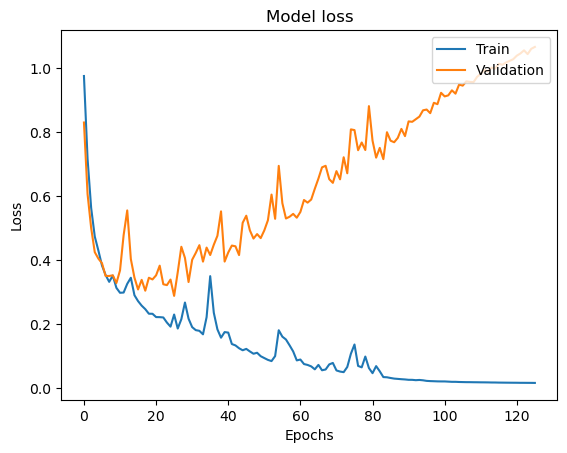

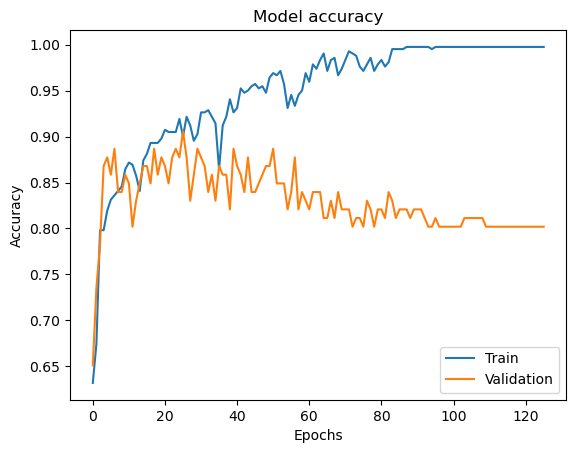

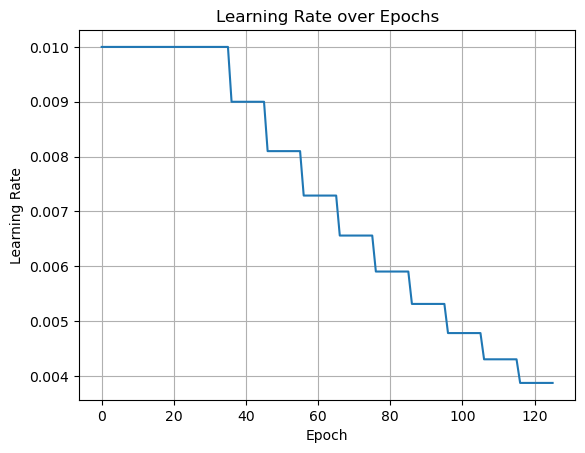

In [14]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plotting
# plt.figure(figsize=(8, 8))
plt.plot(lr_tracker.learning_rates)
plt.title("Learning Rate over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)

In [16]:
# Save the model
tf.keras.models.save_model(model, '../../../Model/STS/FeatureReduced/sts_model_top10')

INFO:tensorflow:Assets written to: ../../../Model/STS/FeatureReduced/sts_model_top10\assets


In [18]:
from tensorflow.keras.models import Model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_0 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
_________________________________________________________________
dense (Dense)                (None, 3)                 12        
Total params: 943
Trainable params: 943
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Assume 'original_model' is your pre-trained model
model_without_softmax = Model(inputs=model.input, 
                              outputs=model.get_layer("dense_2").output)
model_without_softmax.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_0_input (InputLayer)   [(None, 10)]              0         
_________________________________________________________________
dense_0 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Save the model
tf.keras.models.save_model(model_without_softmax, '../../../Model/STS/FeatureReduced/sts_model_top10_without_softmax')

INFO:tensorflow:Assets written to: ../../../Model/STS/FeatureReduced/sts_model_top10_without_softmax\assets


In [ ]:
'''bash
python -m tf2onnx.convert --saved-model path_to_my_model --output model.onnx
'''

In [11]:
# Splitting the dataset based on the 'Fatigue_level' and calculating statistics for each level
fatigue_levels = X_top_features['fatigue_level'].unique()

# Paths for the output files
output_paths = []

for level in fatigue_levels:
    level_stats = X_top_features[X_top_features['fatigue_level'] == level].describe().transpose()[['min', 'max', 'mean', 'std']]
    output_file_path = f'dataset_statistics_fatigue_level_{level}.csv'
    level_stats.to_csv(output_file_path)
    output_paths.append(output_file_path)

output_paths


['dataset_statistics_fatigue_level_1.csv',
 'dataset_statistics_fatigue_level_2.csv',
 'dataset_statistics_fatigue_level_3.csv']